In [30]:
#AMAZON FINE FOOD REVIEWS - SENTIMENT ANALYSIS

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

In [32]:
#nltk download and import

In [33]:
!pip install nltk

In [34]:
import nltk

In [36]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [37]:
data = pd.read_csv("Reviews.csv")

In [38]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [39]:
#Columns needed : Score , Summary , Text 

In [40]:
data.shape

(568454, 10)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [42]:
data.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [43]:
data.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [44]:
#TEXT PREPROCESSING

In [45]:
#Use of TextBlob

In [46]:
!pip install textblob

In [47]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [48]:
# lower casting and removing punctuations n stopwords
#Stopwords are common words, such as "the," "and," "in," "is," and "of," - no use to determine meaning

In [49]:
data['Text'] =  data['Text'].apply(lambda x : " ".join(x.lower() for x in x.split()))

In [50]:
data.Text.head()

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price. there was a wide...
Name: Text, dtype: object

In [51]:
data['Text'] =  data['Text'].str.replace('[^\w\s]',"")

#using ^ (regex for negation) - we here replace the punctuations(not words n space) w nothing("")
#\w -> looks for word characters of a string
#\s -> whitespace character

C:\Users\Veena V\AppData\Local\Temp\ipykernel_14848\1924427131.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] =  data['Text'].str.replace('[^\w\s]',"")


In [52]:
data.Text.head()

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [53]:
#REMOVAL OF STOPWORDS

In [54]:
stop = stopwords.words('english')
data['Text'] =  data['Text'].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

In [55]:
data.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [56]:
#SPELLING CORRECTION

In [57]:
#data['Text'] =  data['Text'].apply(lambda x : str(TextBlob(x).correct()))


In [58]:
#LEMMATIZATION

In [59]:
data['Text'] =  data['Text'].apply(lambda x : " ".join([Word(word).lemmatize() for word in x.split()]))

In [60]:
data.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [61]:
#WORDCLOUD

In [62]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 9.3 kB/s eta 0:00:00


In [63]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [65]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [67]:
data.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<Axes: xlabel='Score', ylabel='count'>

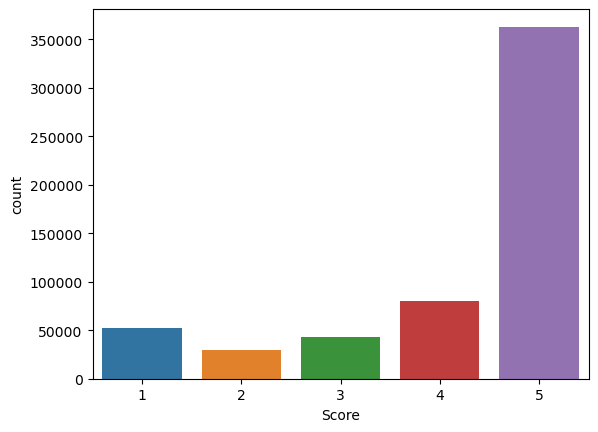

In [68]:
sns.countplot(data = data , x ='Score')

In [69]:
#Creating new df to perform EDA to it
reviews = data
#dropping all null values
reviews.dropna(inplace = True)

In [70]:
score_1= reviews[reviews['Score']==1]
score_2= reviews[reviews['Score']==2]
score_3= reviews[reviews['Score']==3]
score_4= reviews[reviews['Score']==4]
score_5= reviews[reviews['Score']==5]

In [71]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis = 0)
reviews_sample.reset_index(drop = True , inplace = True)

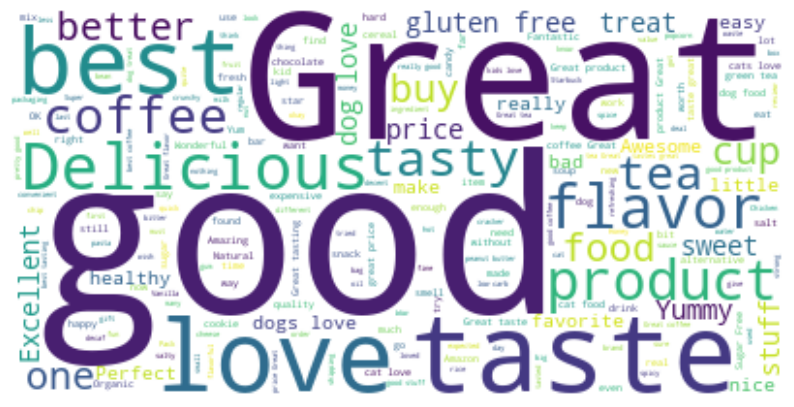

In [75]:
#concating all summaries into a single string as worldcloud's fn inputs a single string
#WORDCLOUD OF ALL REVIEWS
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color ="white").generate(reviews_str)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.show()

In [76]:
#POSITIVE : 4,5  NEGATIVE : 1,2
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

Text(0.5, 1.0, 'Reviews with Positive Scores')

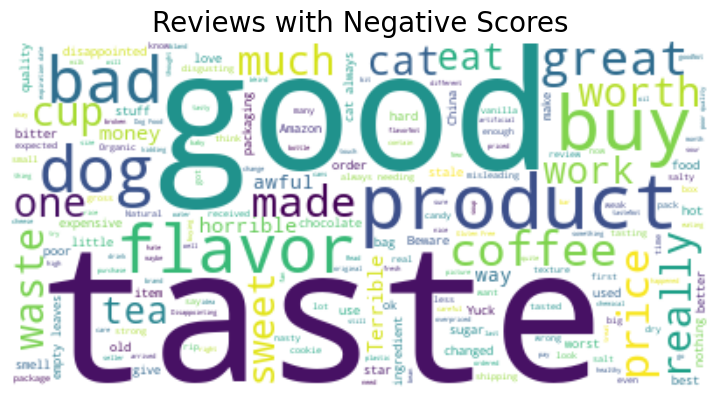

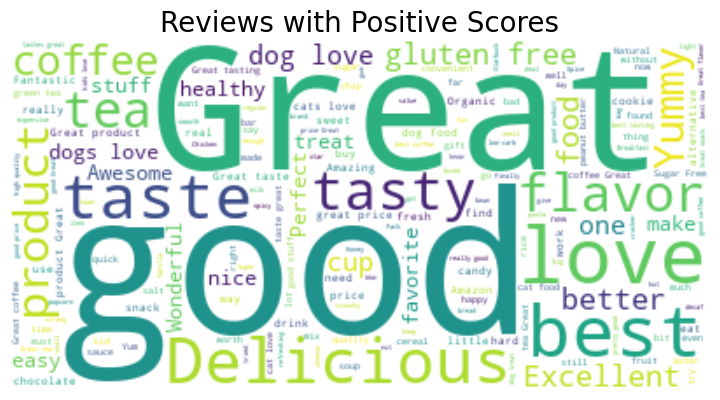

In [79]:
#WORCLOUD FOR POSITIVE AND NEGATIVE SEPERATELY
wordcloud_negative = WordCloud(background_color ="white").generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color ="white").generate(positive_reviews_str)
#plot_negative
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative , interpolation = "bilinear")
ax1.axis("off")
ax1.set_title("Reviews with Negative Scores", fontsize =20)
#plot_negative
fig = plt.figure(figsize = (10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive , interpolation = "bilinear")
ax2.axis("off")
ax2.set_title("Reviews with Positive Scores", fontsize =20)

In [80]:
#SENTIMENT SCORE

In [82]:
#SENTIMENT ANALYSIS - VADERSENTIMENT

In [83]:
!pip install vaderSentiment

     ------------------------------------- 126.0/126.0 kB 25.7 kB/s eta 0:00:00


In [85]:
import re
import os
import sys
import ast

plt.style.use('fivethirtyeight')
#FUNCTION FOR GETTING SENTIMENT

cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [86]:
#Sentiment is generated for all th lines in the dataset
emptyline = []
for row in data['Text']:
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
    
data_senti = pd.DataFrame(emptyline)
data_senti.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


In [87]:
#Merging the sentiments back to reviews dataframe 
data_c = pd.concat([data.reset_index(drop = True), data_senti] ,  axis = 1)
data_c.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468


In [88]:
data_c['Sentiment'] = np.where(data_c['compound'] >= 0 , 'Positive' , 'Negative')
data_c.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,Positive


In [89]:
#RESULT

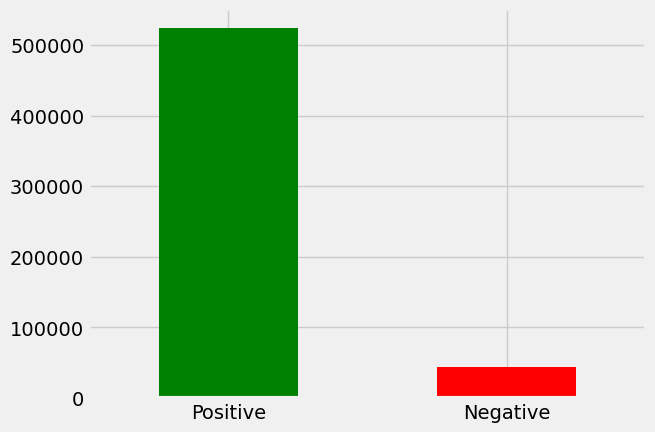

In [93]:
result = data_c['Sentiment'].value_counts()
result.plot(kind = 'bar', rot = 0 , color = ['green' , 'red']);